# **(Task 3.1)** Dynamic Programming

## **(a)** Implementation GPI

In [1]:
import gridworlds        # import to trigger registration of the environment
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt  

class GeneralPolicyIteration:
    
    def __init__(self, env, theta=0.1, gamma=0.99):
        self.env = env
        self.n_actions = env.action_space.n
        self.theta = theta
        self.gamma = gamma
        self.size = 5
        self.policy = np.random.choice(self.n_actions, (self.size,self.size)) 
        self.value_function = np.zeros((self.size,self.size)) 

    def get_policy(self):
        return self.policy
    
    def get_value_function(self):
        return self.value_function
    
    def policy_evaluation(self, value_function, policy): 
        #start with a random policy and determine the state-value function through repeated application of Bellman equation
        while True:
            delta = 0
            for i in range(self.size):
                for j in range(self.size):
                    old_value = value_function[i,j]
                    action = policy[i,j]
                    next_state, reward, done, _, _ = self.env.step(action) 
                    #Handling the terminate states
                    if done:  
                        value_function[i,j] = reward
                    else:
                        value_function[i,j] = reward + self.gamma * value_function[tuple(next_state)]
                    delta = max(delta, abs(old_value - value_function[i,j]))

            if delta < self.theta:
                break

        return value_function

    
    def policy_improvement(self,value_function, policy):
        #use the computed state from policy evaluatuion for policy improvement
        policy_stable = True
        state_values = np.zeros(self.n_actions)
        for i in range(self.size):
            for j in range(self.size):
                old_action = policy[i,j]
                for action in range(self.n_actions):
                    next_state, reward, done, _, _ = self.env.step(action) 
                    if done:
                        state_values[action] = reward
                    else:
                        state_values[action] = reward + self.gamma * value_function[tuple(next_state)]

                policy[i,j] = np.argmax(state_values)    

            if old_action != policy[i,j]:
                policy_stable = False
                
        return policy_stable, policy
    
    def run(self, max_iter):
        #run the GPI algorithm until the policy experiences no further improvements and converges
        policy_stable = False
        for i in range(max_iter):      
            if not policy_stable:
                self.value_function = self.policy_evaluation(self.value_function, self.policy)
                policy_stable, self.policy  = self.policy_improvement(self.value_function, self.policy)
            else:
                return self.policy, self.value_function
                
    
    def draw_grid(self, title):
      
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.set_xticks(np.arange(self.size + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(self.size + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", size=0)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.invert_yaxis()
        ax.set_title(title)
        
        return ax

 
    def visualize(self, value_function, policy):
        #visualize the resulting state-value function and the final optimal policy in a grid

        ax = self.draw_grid("Optimal State-Value Function")
        for i in range(self.size):
            for j in range(self.size):
                ax.text(j, i, f"{value_function[i, j]:.2f}", ha='center', va='center', fontsize=9)
        plt.show()

        action_arrows = {0: '↑', 1: '→', 2: '↓', 3: '←'}
        arrow_policy = np.vectorize(action_arrows.get)(policy)

        ax = self.draw_grid("Optimal Policy")
        for i in range(self.size):
            for j in range(self.size):
                ax.text(j, i, arrow_policy[i, j], ha='center', va='center', fontsize=15)
        plt.show()


Initial policy: 
 [[1 0 2 3 0]
 [0 2 2 0 2]
 [0 2 0 3 1]
 [1 3 3 0 1]
 [1 2 3 1 1]]
Initial value function: 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Optimal policy: [[2 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Value function: [[-89.19974742 -90.19974742 -89.10075497 -90.10075497 -90.10075497]
 [-90.19974742 -90.19974742 -90.19974742 -90.19974742 -90.19974742]
 [-90.19974742 -90.19974742 -90.19974742 -90.19974742 -90.19974742]
 [-90.19974742 -90.19974742 -90.19974742 -90.19974742 -90.19974742]
 [-90.19974742 -90.19974742 -90.19974742 -90.19974742 -90.19974742]]
Visualisaton for optimal policy


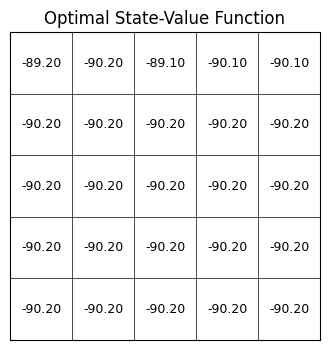

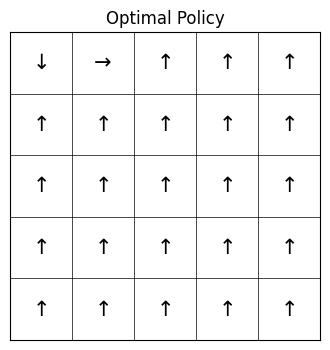

In [3]:
env = gym.make("gridworld-v0")
env.reset()
gpi = GeneralPolicyIteration(env)
print(f"Initial policy: \n {gpi.get_policy()}")
print(f"Initial value function: \n {gpi.get_value_function()}")
policy, value_function = gpi.run(max_iter=1000)
print(f"Optimal policy: {policy}")
print(f"Value function: {value_function}")
print("Visualisaton for optimal policy")
gpi.visualize(value_function, policy)